In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={"figure.figsize": (16, 6)})

**IMPORT DATA FROM CLEAN CSV**

In [2]:
pd.set_option('display.max_columns', None)
shark_attacks = pd.read_csv("../data/clean_attacks.csv", encoding="latin1")
shark_attacks = pd.DataFrame(shark_attacks)
shark_attacks.sample(3)

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,clean_time,clean_age,clean_year,clean_sex,clean_activity
3644,1965.00.00.e,Early 1965,1965.0,Provoked,USA,Florida,"Between Palm & Salerno Inlets, Martin County",Collecting marine specimens,Frank ---,M,NaN,"No injury, shark tore his wetsuit after he gra...",N,NaN,"Nurse shark, 0.94 m to 1.2 m [3' to 4']","M. Vorenberg, GSAF",Unknown,Unknown,1965,M,Unknown
2968,1982.08.29.b,29-Aug-1982,1982.0,Invalid,USA,California,"Morro Rock, Morro Bay, San Obispo County",Surfing,John Buchanan,M,17,"No Injury, board bitten",NaN,10h20,Questionable incident; reported as shark attac...,"R.N. Lea & D. Miller; R. Collier, pp.87-89",Morning,17,1982,M,Surfing
2478,1993.08.19.R,Reported 19-Aug-1993,1993.0,Unprovoked,USA,Florida,"Bethune Beach, Volusia County",Surfing,Shawn Bushong,NaN,13,Right foot bitten,N,NaN,NaN,"Deseret News, 8/19/1993",Unknown,13,1993,Unknown,Surfing


**VISUALIZATION**

    A Century of Shark Attacks: Tracing the Evolution

C:\Users\noemi\AppData\Local\Temp\ipykernel_18204\1337487043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks_1['clean_year'] = shark_attacks_1['clean_year'].astype(int)


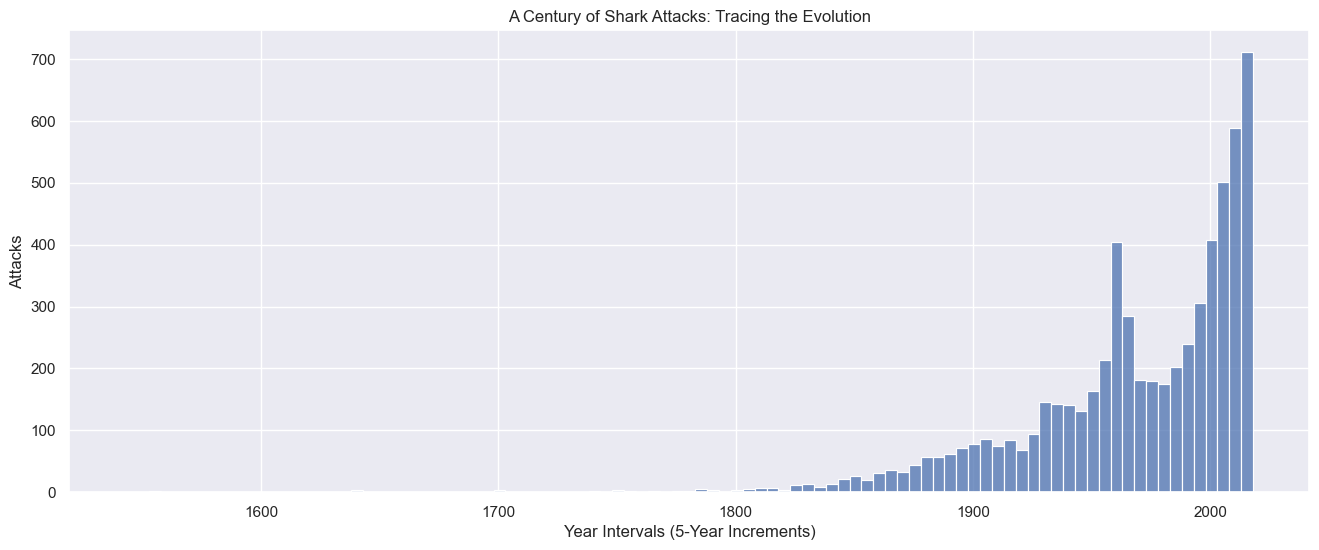

In [4]:
shark_attacks_1 = shark_attacks[shark_attacks['clean_year'] != 'Unknown']
shark_attacks_1['clean_year'] = shark_attacks_1['clean_year'].astype(int)
bins = range(int(shark_attacks_1['clean_year'].min()), int(shark_attacks_1['clean_year'].max()) + 5, 5)
sns.histplot(data=shark_attacks_1, x='clean_year', bins=bins)
plt.title('A Century of Shark Attacks: Tracing the Evolution')
plt.xlabel('Year Intervals (5-Year Increments)')
plt.ylabel('Attacks')
plt.show()

In [5]:
print("Max is: ", max(shark_attacks_1['clean_year']))
print("Min is: ", min(shark_attacks_1['clean_year']))

Max is:  2018
Min is:  1543


As there were almost no attacks between 1543 and 1800, now I want to plot the evolution of attacks through years since they started to be visible in the plot above.

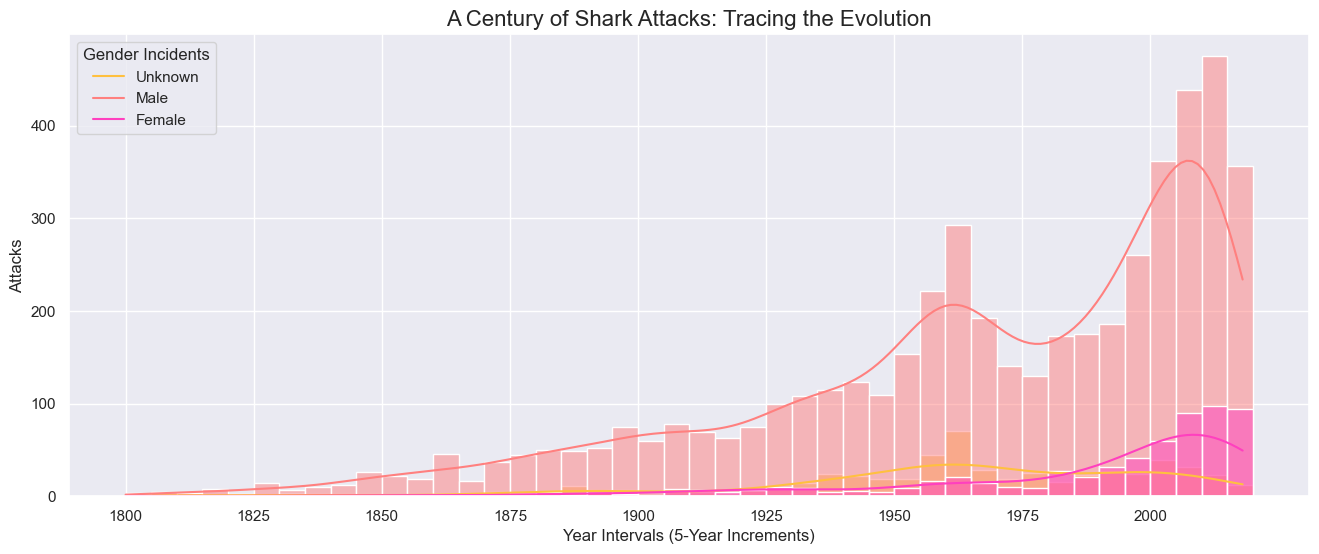

In [6]:
shark_attacks_1 = shark_attacks_1[shark_attacks_1['clean_year'] >= 1800]
bins = range(int(shark_attacks_1['clean_year'].min()), int(shark_attacks_1['clean_year'].max()) + 5, 5)
plot_1 = sns.histplot(data=shark_attacks_1, x='clean_year', bins=bins, kde=True, palette="spring", hue='clean_sex')
plt.title('A Century of Shark Attacks: Tracing the Evolution', fontsize=16)
plt.xlabel('Year Intervals (5-Year Increments)')
plt.ylabel('Attacks')
plt.legend(labels=["Unknown", "Male", "Female"], title="Gender Incidents")
plt.xticks(range(shark_attacks_1['clean_year'].min(), shark_attacks_1['clean_year'].max() + 1, 25))
plot_1.figure.savefig(f'../images/trace_evolution.png', bbox_inches='tight')
plt.show()

The kde=True compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s). Only relevant with univariate data.

    Shark Attack Activities: What Stands Out as the Most Common?

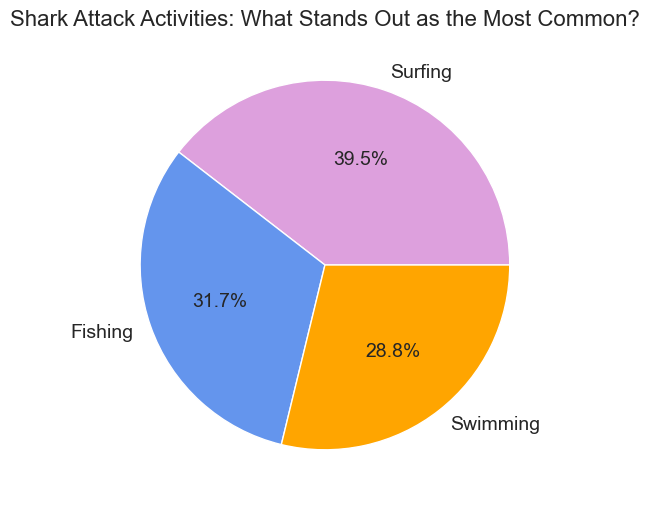

In [10]:
shark_attacks_2 = shark_attacks[shark_attacks['clean_activity'] != 'Unknown']
activities = set(shark_attacks_2['clean_activity'])
mean = len(shark_attacks_2) / len(activities)
activities_ = shark_attacks_2['clean_activity'].value_counts()
activities_to_keep = activities_[activities_ >= mean].index
# Filtrar el DataFrame original para mantener solo las actividades en activities_to_keep
shark_attacks_filtered = shark_attacks_2[shark_attacks_2['clean_activity'].isin(activities_to_keep)]
shark_attacks_filtered_count = shark_attacks_filtered['clean_activity'].value_counts()
shark_attacks_filtered_count.plot.pie(autopct="%.1f%%", colors=['plum', 'cornflowerblue', 'orange'], textprops={'fontsize':14})
plt.title('Shark Attack Activities: What Stands Out as the Most Common?', fontsize=16)
plt.ylabel('')
plt.savefig(f'../images/most_common_activity.png', bbox_inches='tight')
plt.show()



    Shark Attack Patterns: The Age Connection (Young Minds at Play)

C:\Users\noemi\AppData\Local\Temp\ipykernel_18204\3988915195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks_3['clean_age'] = shark_attacks_3['clean_age'].astype(int)


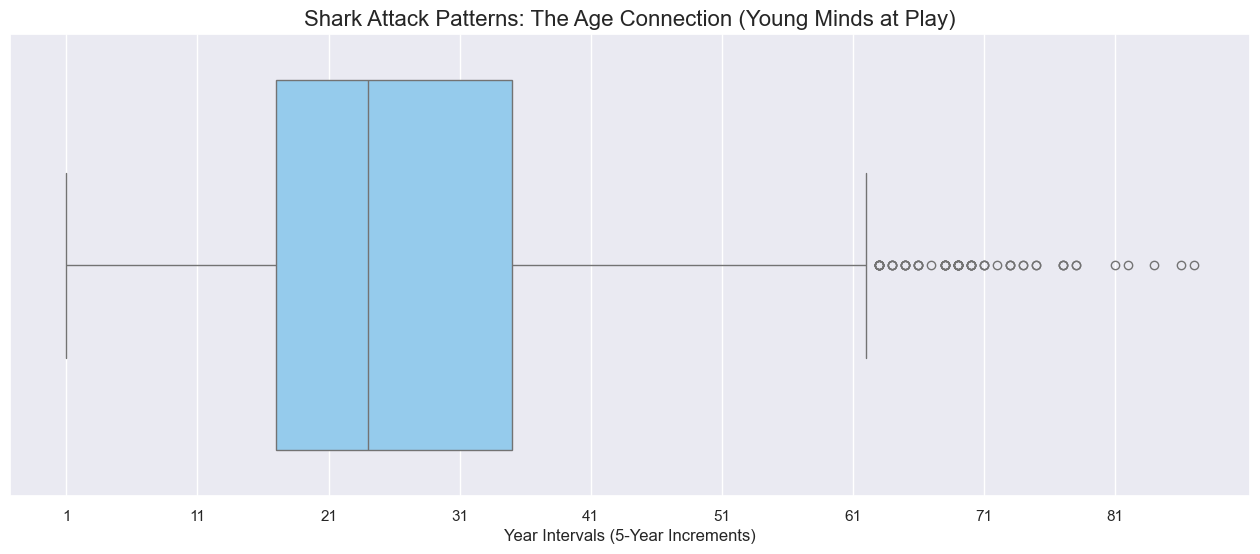

In [8]:
shark_attacks_3 = shark_attacks[(shark_attacks['clean_age'] != '< 1') & (shark_attacks['clean_age'] != 'Unknown')]
shark_attacks_3['clean_age'] = shark_attacks_3['clean_age'].astype(int)
shark_attacks_3 = shark_attacks_3.sort_values(by='clean_age')
plot_3 = sns.boxplot(data=shark_attacks_3, x='clean_age', color="lightskyblue")
plt.title('Shark Attack Patterns: The Age Connection (Young Minds at Play)', fontsize=16)
plt.xlabel('Year Intervals (5-Year Increments)')
plt.xticks(range(shark_attacks_3['clean_age'].min(), shark_attacks_3['clean_age'].max(), 10))
plot_3.figure.savefig(f'../images/age_attack_patterns.png', bbox_inches='tight')
plt.show()


    Exploring Shark Activity: A 24-Hour Perspective

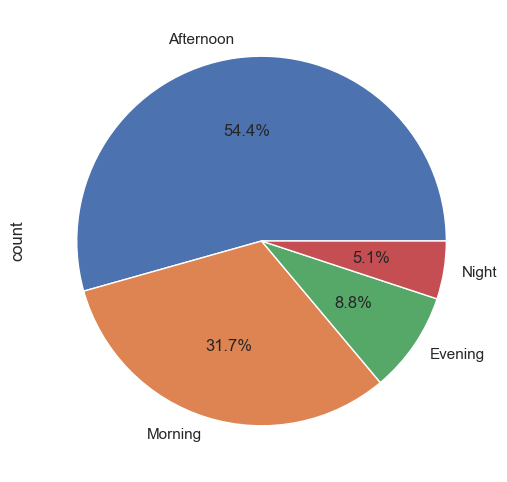

In [15]:
shark_attacks_4 = shark_attacks[shark_attacks['clean_time'] != 'Unknown']
shark_activity = shark_attacks_4['clean_time'].value_counts()
shark_activity.plot.pie(autopct="%.1f%%")
plt.show()